## Target guided encodings

In the previous lectures in this section, we learned how to convert a label into a number, by using one hot encoding, replacing by a digit or replacing by frequency or counts of observations. These methods are simple, make (almost) no assumptions and work generally well in different scenarios.

There are however methods that allow us to capture information while pre-processing the labels of categorical variables. These methods include:

- Ordering the labels according to the target
- Replacing labels by the target mean (mean encoding / target encoding)
- Replacing the labels by the probability ratio of the target being 1 or 0
- Weight of evidence.

All of the above methods have something in common:

- the encoding is **guided by the target**, and
- they create a **monotonic relationship** between the variable and the target.


### Monotonicity

A monotonic relationship is a relationship that does one of the following:

- (1) as the value of one variable increases, so does the value of the other variable; or
- (2) as the value of one variable increases, the value of the other variable decreases.

In this case, as the value of the independent variable (predictor) increases, so does the target, or conversely, as the value of the variable increases, the target value decreases.



### Advantages of target guided encodings

- Capture information within the category, therefore creating more predictive features
- Create a monotonic relationship between the variable and the target, therefore suitable for linear models
- Do not expand the feature space


### Limitations

- Prone to cause over-fitting
- Difficult to cross-validate with current libraries


### Note

The methods discussed in this and the coming 3 lectures can be also used on numerical variables, after discretisation. This creates a monotonic relationship between the numerical variable and the target, and therefore improves the performance of linear models. I will discuss this in more detail in the section "Discretisation".

===============================================================================

## Ordered Integer Encoding

Ordering the categories according to the target means assigning a number to the category from 1 to k, where k is the number of distinct categories in the variable, but this numbering is informed by the mean of the target for each category.

For example, we have the variable city with values London, Manchester and Bristol; if the default rate is 30% in London, 20% in Bristol and 10% in Manchester, then we replace London by 1, Bristol by 2 and Manchester by 3.

## In this demo:

We will see how to perform one hot encoding with:
- pandas
- Feature-Engine

And the advantages and limitations of these implementations using the House Prices dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.encoding import OrdinalEncoder

In [2]:
data = pd.read_excel(
    'HousingPrices.xls', usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice'])
data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500.0
1,Veenker,MetalSd,MetalSd,181500.0
2,CollgCr,VinylSd,VinylSd,223500.0
3,Crawfor,Wd Sdng,Wd Shng,140000.0
4,NoRidge,VinylSd,VinylSd,250000.0


**Check how many labels each variable has!**

In [3]:
for col in data.columns:
    print(col, ': ', len(data[col].unique()), ' labels')

Neighborhood :  25  labels
Exterior1st :  16  labels
Exterior2nd :  17  labels
SalePrice :  664  labels


**Explore the unique categories!**

In [4]:
data['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [5]:
data['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock', nan], dtype=object)

In [6]:
data['Exterior2nd'].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock', nan], dtype=object)

### Encoding important

We select which digit to assign each category using the train set, and then use those mappings in the test set.

**Note that to do this technique with pandas, we need to keep the target within the training set**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']],  # Keep the target!!
    data['SalePrice'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility
X_train.shape, X_test.shape

((2043, 4), (876, 4))

### Explore original relationship between categorical variables and target

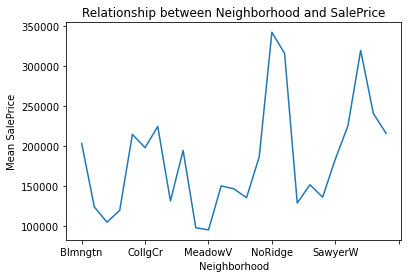

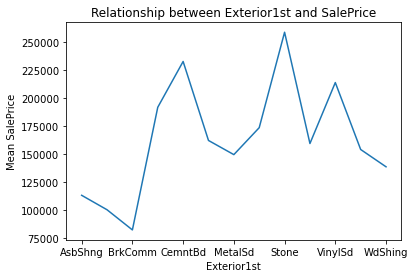

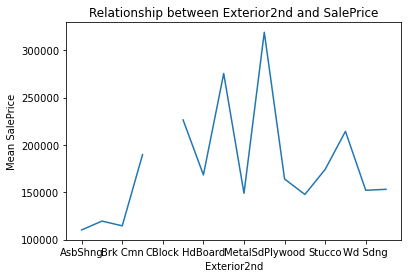

In [8]:
for var in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    fig = plt.figure()
    fig = X_train.groupby([var])['SalePrice'].mean().plot()
    fig.set_title('Relationship between {} and SalePrice'.format(var))
    fig.set_ylabel('Mean SalePrice')
    plt.show()

You can see that the relationship between the target and the categories of the categorical variables goes up and down, depending on the category.


## Ordered Integer encoding with pandas


### Advantages

- quick
- returns pandas dataframe

### Limitations of pandas:

- it does not preserve information from train data to propagate to test data

We need to store the encoding maps separately if planing to use them in production.

**Order the labels according to the mean target value!...**

In [9]:
X_train.groupby(['Neighborhood'])['SalePrice'].mean().sort_values()

Neighborhood
MeadowV     95450.000000
IDOTRR      98149.458333
BrDale     105100.000000
BrkSide    119834.146341
Blueste    124000.000000
OldTown    128945.123457
Edwards    131516.461538
NPkVill    135625.000000
Sawyer     136320.912281
NAmes      146622.727273
Mitchel    150255.636364
SWISU      151739.625000
SawyerW    183524.431818
NWAmes     186439.534884
Gilbert    194467.655172
CollgCr    197961.031915
Blmngtn    203196.900000
ClearCr    214492.000000
Veenker    215916.666667
Crawfor    224394.083333
Somerst    225391.750000
Timber     240655.384615
NridgHt    315382.446429
StoneBr    319236.000000
NoRidge    341797.777778
Name: SalePrice, dtype: float64

In the above cell, we ordered the categories from the neighbourhood where the houses sale prices are cheaper (IDOTRR), to the neighbourhood where the house prices are, on average, more expensive (NoRidge).

In the next cells, we will replace those categories, ordered as they are, by the numbers 0 to k, where k is the number of different categories minus 1, in this case 25 - 1 = 24.

So IDOTRR will be replaced by 0 and NoRidge by 24, just to be clear.

**Generate an ordered list with the labels!**

In [10]:
ordered_labels = X_train.groupby(['Neighborhood'
                                  ])['SalePrice'].mean().sort_values().index
ordered_labels

Index(['MeadowV', 'IDOTRR', 'BrDale', 'BrkSide', 'Blueste', 'OldTown',
       'Edwards', 'NPkVill', 'Sawyer', 'NAmes', 'Mitchel', 'SWISU', 'SawyerW',
       'NWAmes', 'Gilbert', 'CollgCr', 'Blmngtn', 'ClearCr', 'Veenker',
       'Crawfor', 'Somerst', 'Timber', 'NridgHt', 'StoneBr', 'NoRidge'],
      dtype='object', name='Neighborhood')

**Create a dictionary with the mappings of categories to numbers!**

In [11]:
ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}
ordinal_mapping

{'MeadowV': 0,
 'IDOTRR': 1,
 'BrDale': 2,
 'BrkSide': 3,
 'Blueste': 4,
 'OldTown': 5,
 'Edwards': 6,
 'NPkVill': 7,
 'Sawyer': 8,
 'NAmes': 9,
 'Mitchel': 10,
 'SWISU': 11,
 'SawyerW': 12,
 'NWAmes': 13,
 'Gilbert': 14,
 'CollgCr': 15,
 'Blmngtn': 16,
 'ClearCr': 17,
 'Veenker': 18,
 'Crawfor': 19,
 'Somerst': 20,
 'Timber': 21,
 'NridgHt': 22,
 'StoneBr': 23,
 'NoRidge': 24}

**Replace the labels with the integers!**

In [12]:
X_train['Neighborhood'] = X_train['Neighborhood'].map(ordinal_mapping)
X_test['Neighborhood'] = X_test['Neighborhood'].map(ordinal_mapping)

**Explore the result!**

In [13]:
X_train['Neighborhood'].head(10)

1448     6
1397     3
1       18
384     17
530     21
588     17
1027    21
2779     5
453     20
2057     9
Name: Neighborhood, dtype: int64

**Turn the previous commands into 2 functions! In first generate an ordered list with the labels, and return the dictionary with mappings**

In [14]:
def find_category_mappings(df, variable, target):
    ordered_labels = df.groupby([variable])[target].mean().sort_values().index
    return {k: i for i, k in enumerate(ordered_labels, 0)}
def integer_encode(train, test, variable, ordinal_mapping):
    train[variable] = train[variable].map(ordinal_mapping)
    test[variable] = test[variable].map(ordinal_mapping)

**The loop over the remaining categorical variables!**

In [15]:
for variable in ['Exterior1st', 'Exterior2nd']:
    mappings = find_category_mappings(X_train, variable, 'SalePrice')
    integer_encode(X_train, X_test, variable, mappings)

**See the result!**

In [16]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
1448,6,4.0,8.0,112000.0
1397,3,4.0,4.0,137500.0
1,18,4.0,4.0,181500.0
384,17,7.0,8.0,240000.0
530,21,7.0,8.0,175000.0


**Inspect the newly created monotonic relationship between the variables and the target!**

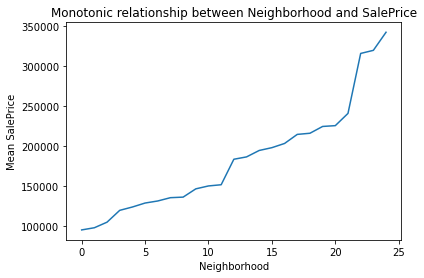

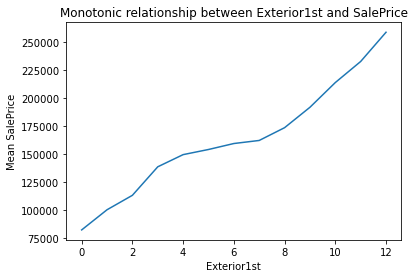

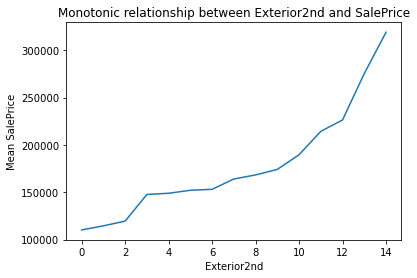

In [17]:
for var in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    fig = plt.figure()
    fig = X_train.groupby([var])['SalePrice'].mean().plot()
    fig.set_title('Monotonic relationship between {} and SalePrice'.format(var))
    fig.set_ylabel('Mean SalePrice')
    plt.show()

We see from the plots above that the relationship between the categories and the target is now monotonic, and for the first 2 variables, almost linear, which helps improve linear models performance.

### Note

Monotonic does not mean strictly linear. Monotonic means that it increases constantly, or it decreases constantly.

Replacing categorical labels with this code and method will generate missing values for categories present in the test set that were not seen in the training set. Therefore it is extremely important to handle rare labels before-hand. I will explain how to do this, in a later notebook.

## Integer Encoding with Feature-Engine

If using **Feature-Engine**, instead of pandas, we do not need to keep the target variable in the training dataset.

In [21]:
data1= data[['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']].dropna()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    data1[['Neighborhood', 'Exterior1st', 'Exterior2nd']], # predictors
    data1['SalePrice'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility
X_train.shape, X_test.shape

((1022, 3), (438, 3))

**NOTE** Indicate **ordered in the encoding_method**, otherwise it assings numbers **arbitrarily**!

In [24]:
ordinal_enc = OrdinalEncoder(
    # NOTE that we indicate ordered in the encoding_method, otherwise it assings numbers arbitrarily
    encoding_method='ordered',
    variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'])

**When fitting the transformer, we need to pass the target as well just like with any Scikit-learn predictor class!**

In [25]:
ordinal_enc.fit(X_train, y_train)

OrdinalEncoder(variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'])

**In the encoder dict we can observe each of the top categories selected for each of the variables!**

In [26]:
ordinal_enc.encoder_dict_

{'Neighborhood': {'IDOTRR': 0,
  'BrDale': 1,
  'MeadowV': 2,
  'Edwards': 3,
  'BrkSide': 4,
  'OldTown': 5,
  'Sawyer': 6,
  'Blueste': 7,
  'SWISU': 8,
  'NPkVill': 9,
  'NAmes': 10,
  'Mitchel': 11,
  'SawyerW': 12,
  'Gilbert': 13,
  'NWAmes': 14,
  'Blmngtn': 15,
  'CollgCr': 16,
  'ClearCr': 17,
  'Crawfor': 18,
  'Somerst': 19,
  'Veenker': 20,
  'Timber': 21,
  'NridgHt': 22,
  'StoneBr': 23,
  'NoRidge': 24},
 'Exterior1st': {'BrkComm': 0,
  'AsphShn': 1,
  'CBlock': 2,
  'AsbShng': 3,
  'WdShing': 4,
  'Wd Sdng': 5,
  'MetalSd': 6,
  'HdBoard': 7,
  'Plywood': 8,
  'Stucco': 9,
  'BrkFace': 10,
  'VinylSd': 11,
  'CemntBd': 12,
  'Stone': 13,
  'ImStucc': 14},
 'Exterior2nd': {'AsphShn': 0,
  'CBlock': 1,
  'AsbShng': 2,
  'Brk Cmn': 3,
  'Wd Shng': 4,
  'MetalSd': 5,
  'Stone': 6,
  'Wd Sdng': 7,
  'Plywood': 8,
  'HdBoard': 9,
  'Stucco': 10,
  'BrkFace': 11,
  'ImStucc': 12,
  'VinylSd': 13,
  'CmentBd': 14,
  'Other': 15}}

**The list of variables that the encoder will transform!**

In [27]:
ordinal_enc.variables_

['Neighborhood', 'Exterior1st', 'Exterior2nd']

**Explore the result!**

In [28]:
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd
64,16,11,13
682,17,5,7
960,4,5,8
1384,3,4,4
1100,8,5,7


**Note**

If the argument variables is left to None, then the encoder will automatically identify all categorical variables. Is that not sweet?

The encoder will not encode numerical variables. So if some of your numerical variables are in fact categories, you will need to re-cast them as object before using the encoder.

Finally, if there is a label in the test set that was not present in the train set, the encoder will through and error, to alert you of this behaviour.